# **FIFA 20**

FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 27th installment in the FIFA series, and was released on 27 September 2019 for Microsoft Windows, PlayStation 4, Xbox One, and Nintendo Switch. 


Real Madrid winger Eden Hazard was named the new cover star of the Regular Edition, with Liverpool defender Virgil van Dijk on the cover of the Champions Edition.Former Juventus and Real Madrid midfielder Zinedine Zidane was later named as the cover star for the Ultimate Edition.



---

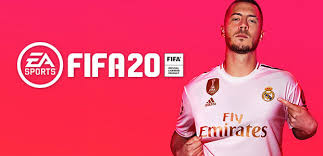

# **CONTENTS**
 

*   Data Analysis
*   Data Cleaning
*   Data Visualization with Plotly 


* Scatter Plots
    * Finding Relationship between Overall Rating and Value in Euros with a scatter plot
    * Finding Relationship between Overall Rating and BMI of a player with a scatter plot
    * Finding Relationship between Potential Rating and Wages in Euros with a scatter plot
    
    
* Pie Charts
    * Analyzing Preferred Foot of Player
    * Analyzing Percentage of Clubs in Top 25 FIFA Players
    * Analyzing Percentage of Nations in Top 25 FIFA Players
    
    
* Bar Chart
    * Comparing Potential of Top 10 FIFA Players with Age
    
    
* 3D Plots
    * 3D Plot of Potential, Overall and Wage in Euros of Top 20 FIFA Players
    * 3D Plot of Potential, Overall and Value in Euros of Top 20 FIFA Players



In [ ]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
import plotly.express as px

# **1. Data Analysis**

In [ ]:
fifa_20 = pd.read_csv('../input/fifa-20-complete-player-dataset/players_20.csv')

In [ ]:
fifa_20.head()

In [ ]:
fifa_20.shape # To check no of rows and columns

In [ ]:
col = list(fifa_20.columns)  # To print all the columns
print(col)

In [ ]:
useless_column = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']

In [ ]:
fifa_20 = fifa_20.drop(useless_column, axis = 1)

In [ ]:
fifa_20.shape # To check how many columns did we dropped

In [ ]:
fifa_20['BMI'] = fifa_20 ['weight_kg'] / (fifa_20['height_cm'] / 100) ** 2

In [ ]:
fifa_20.head()

# **2. Data Cleaning**

In [ ]:
fifa_20[['short_name','player_positions']]

In [ ]:
new_player_position = fifa_20['player_positions'].str.get_dummies(sep=',').add_prefix('Position')
new_player_position.head()

In [ ]:
fifa_20 =  pd.concat([fifa_20,new_player_position],axis = 1)

In [ ]:
fifa_20 =  fifa_20.drop('player_positions',axis=1)

In [ ]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [ ]:
fifa_20[columns].head()

In [ ]:
for col in columns:
  fifa_20[col]=fifa_20[col].str.split('+',n=1,expand = True)[0]

fifa_20[columns]

In [ ]:
fifa_20[columns] = fifa_20[columns].fillna(0)

In [ ]:
fifa_20[columns] = fifa_20[columns].astype(int)

In [ ]:
columns = ['dribbling','defending','physic','passing','shooting','pace']

In [ ]:
fifa_20[columns]

In [ ]:
fifa_20[columns].isnull().sum()

In [ ]:
for col in columns:
  fifa_20[col] = fifa_20[col].fillna(fifa_20[col].median())
fifa_20[columns]

In [ ]:
fifa_20 = fifa_20.fillna(0)

In [ ]:
fifa_20.isnull().sum() # To check null values

 Finally , Data is cleaned as there are no null values.


# 3. **Data Visualization with Plotly**

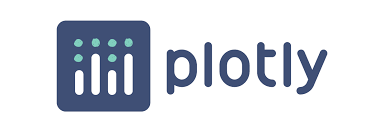
So , Are you aware of Plotly ?

The Plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

Now, We are going to analyse and find insights with this interactive Visualization Library.

In [ ]:
# Scatter Plot in Plotly
fig = go.Figure(data=go.Scatter(x=fifa_20['overall'],y=fifa_20['value_eur'],mode='markers',marker=dict(size=10,color=fifa_20['age'],showscale=True),text=fifa_20['short_name']))
fig.update_layout(title='Scatter Plot for Overall Rating v Value in Euros',xaxis_title='Overall Rating',yaxis_title='Value in Euros')

fig.show()

Isn't Neymar's value the highest ?





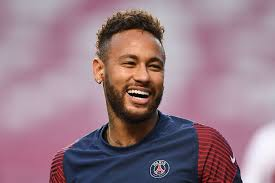

In [ ]:
# Scatter Plot
fig = go.Figure(data=go.Scatter(x=fifa_20['overall'],y=fifa_20['BMI'],mode='markers',marker=dict(size=10,color=fifa_20['age'],showscale=True),text=fifa_20['short_name']))
fig.update_layout(title='Scatter Plot for Overall Rating v BMI of a Player',xaxis_title='Overall Rating',yaxis_title='BMI of a Player')
fig.show()

Are you looking at Adebayo Akinfenwa ?

The one with the Highest BMI overall in Football


Well , He is an English professional footballer who plays as a striker for EFL Championship club Wycombe Wanderers.

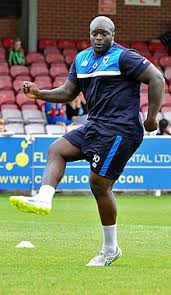

In [ ]:
# Scatter Plot
fig = go.Figure(data=go.Scatter(x=fifa_20['potential'],y=fifa_20['wage_eur'],mode='markers',marker=dict(size=10,color=fifa_20['age'],showscale=True),text=fifa_20['short_name']))
fig.update_layout(title='Scatter Plot for Potential Rating v Wage in Euros',xaxis_title='Potential Rating',yaxis_title='Wage in Euros')
fig.show()

At the Top Highest Wage ?

Your Guess it correct

The Greatest of All Time  - Leo Messi



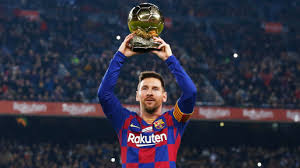

In [ ]:
# Analysis of Preferred Foot through a Pie Chart
fig = px.pie(fifa_20,names='preferred_foot',title='Percentage of Players as per there preferred Foot')
fig.show()

76.4 % uses Right Foot

But Who has the Best Right Foot ?

Your Guess is Absolutely Correct

**CR7**



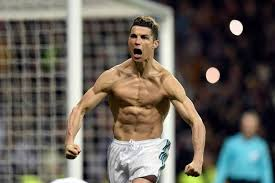

In [ ]:
# Pie Chart
fig = px.pie(fifa_20.head(25),names='club',title='Percentage of Clubs in Top 25 FIFA Players')
fig.show()

Here , The Winner is FC Barcelona

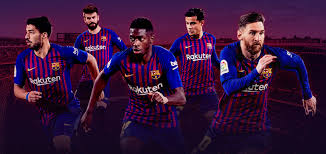

In [ ]:
# Pie Chart
fig = px.pie(fifa_20.head(25),names='nationality',title='Percentage of Nations in Top 25 FIFA Players')
fig.show()

Well , Our Current FIFA WorldCup 2018 Champions are winner here

FRANCE

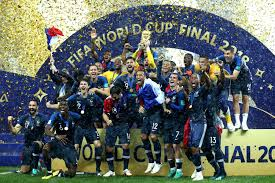

In [ ]:
# Bar Charts
fig = px.bar(fifa_20.head(10), y='potential',x='short_name',color='age',
             labels={'Overall Rating v Nation of Top 20'}, height=400)
fig.update_layout(title='Comparison of Potential of Top 10 FIFA Players',xaxis_title='Player Name',yaxis_title='Potential')
fig.show()

In [ ]:
# 3D Plots
fig = px.scatter_3d(fifa_20.head(20), x='potential', y='overall', z='wage_eur',
              color='short_name')
fig.update_layout(title='3D Plot of Potential, Overall and Wage in Euros of Top 20 FIFA Players')
fig.show()

In [ ]:
# 3D Plots
fig = px.scatter_3d(fifa_20.head(20), x='potential', y='overall', z='value_eur',
              color='short_name')
fig.update_layout(title='3D Plot of Potential, Overall and Value in Euros of Top 20 FIFA Players')
fig.show()

That's the end of my notebook

Hope You liked it !